# Flights in the United States by Kunal Vaishnavi

In this project, I created a visualization of flights in the United States over time, along with information about those flights. Here is the documentation of how I went about doing so:

First, I imported libraries that I needed to clean my dataset.

In [ ]:
import json
import numpy as np
import pandas as pd
import csv

df = pd.read_csv("flights.csv")

Unfortunately, it wasn't working. It turned out that it was because the CSV is so huge (about 5.8 million rows). With the help of this [link](https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options), I was able to now use all memory necessary to process the CSV.

In [ ]:
import json
import numpy as np
import pandas as pd
import csv

df = pd.read_csv("flights.csv", low_memory = False)

Next, I removed unnecessary data like the amount of time lost due to delays since all that I need to know is the departure time and arrival time.

In [ ]:
df.drop(df.columns[[0,3,12,13,14,15,16,18,19,20,23,24,25,26,27,28,29,30]], axis=1, inplace=True)

Then, I set up my HTML file with my JSON files, which have the coordinates of the airports and the coordinates to draw the United States map. The goal of this step is to have my data points show up on my US map.

I first tried putting my data points in as paths. Initially, everything came out normally. However, I had to put my data points as actual circles. So, I used this [reference](http://bl.ocks.org/phil-pedruco/7745589) and I thought that everything would work. However, I kept receiving the same error, which was along the lines of "this data can't be indexed at 0". Initially, I was very confused by it. After spending several hours and along with Dr. Z's help in class, I was finally able to realize that my dataset was causing these errors. It just so happens that my dataset included places that are part of the US not in the 50 states (American Samoa, Puerto Rico, etc) and that was what was causing the error. I removed those data points and my map finally appeared as it did from the beginning with the data points.

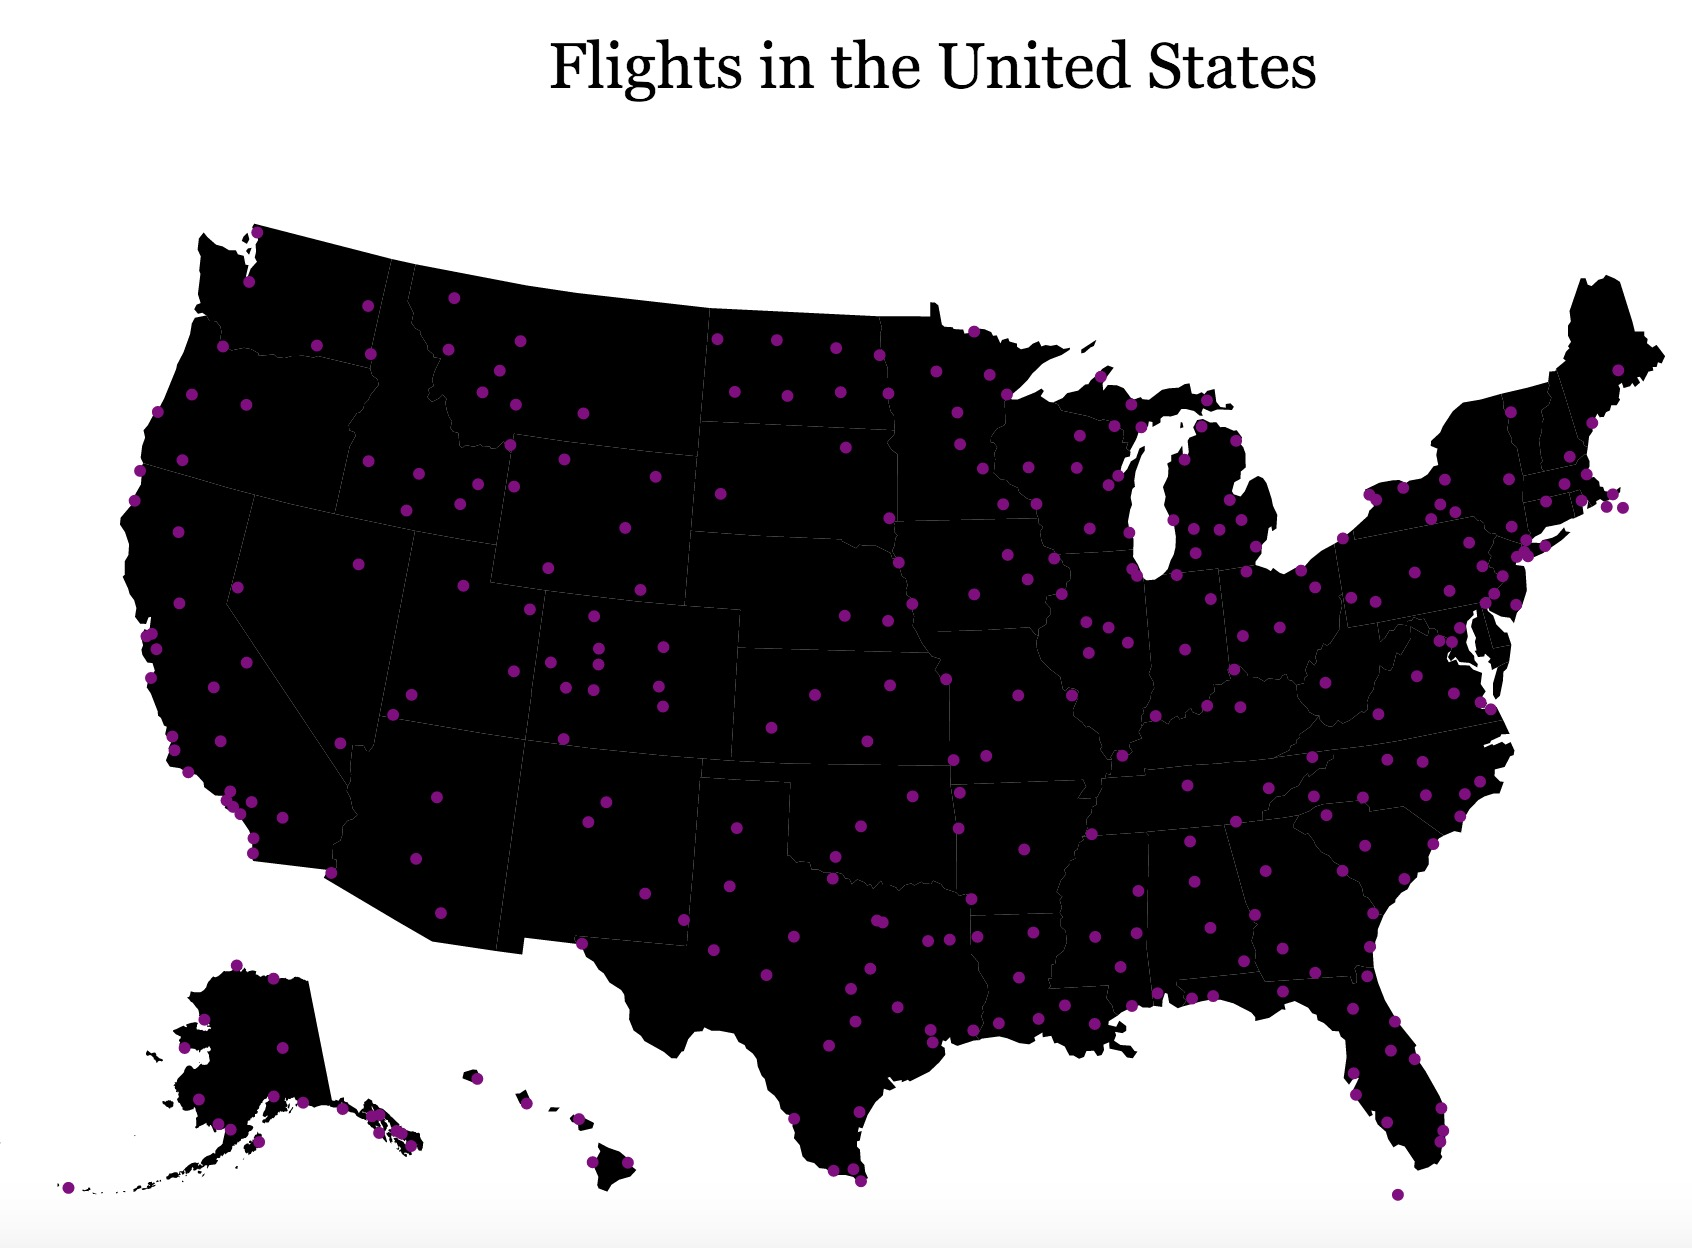

I then removed three points that look as if they're off the map: the two points off the coast of MA and one that is in the Florida Keys but looks as if it's in the ocean.

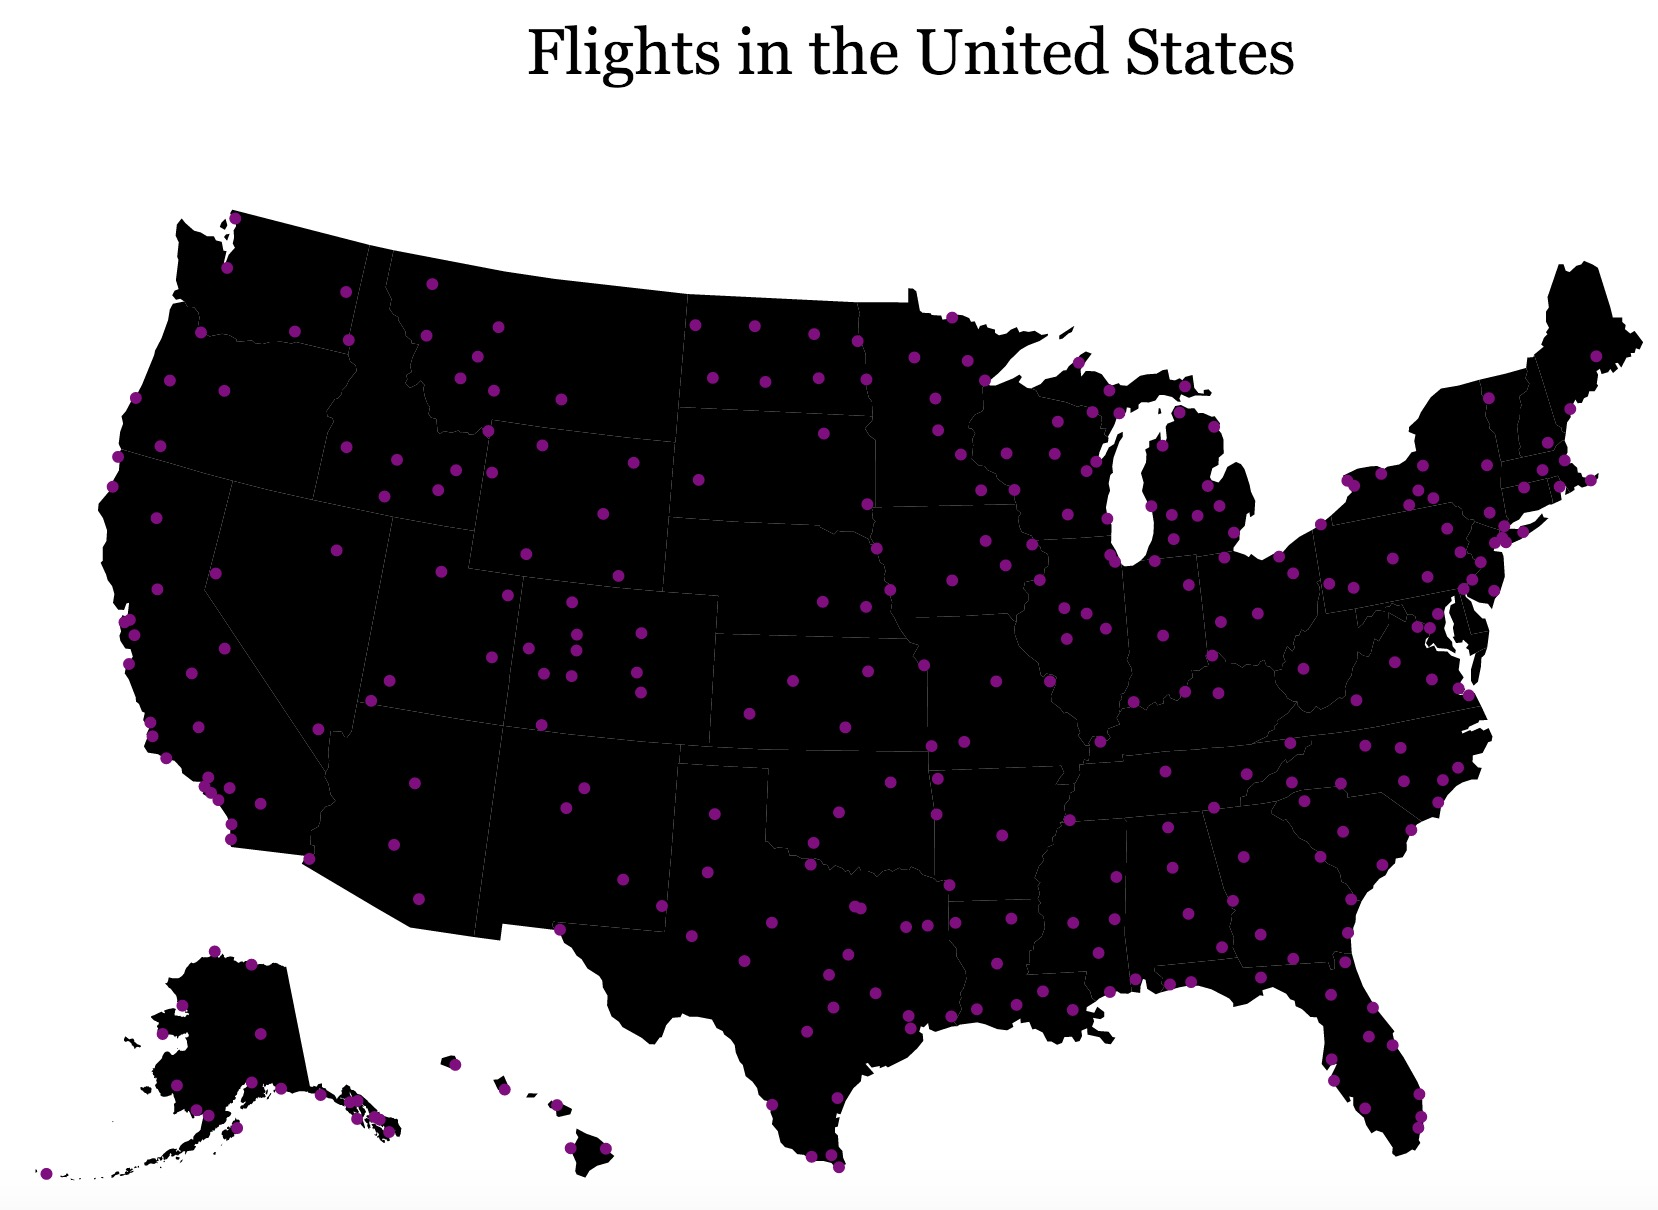

Since I deleted certain data from the GeoJSON, I had to delete the corresponding data in the CSV. So, I removed the following rows with these airport codenames: UST, PBG, XNA, BQN, PSE, SJU, GUM, PPG, STT, STX, MVY, ACK, EYW, ECP.

I started to do this and whenever I ran my code to remove rows with those airport codenames, the computer would never finish running the cell because it was so much data. So, I decided to take a slice of my dataset and only examine the flights leaving on the first day of every month.

In [ ]:
temp = df[df.DAY == 1]
temp = temp.reset_index(drop=True)
temp

In [ ]:
toDelete = {'UST', 'PBG', 'XNA', 'BQN', 'PSE', 'SJU', 'GUM', 'PPG', 'STT', 'STX', 'MVY', 'ACK', 'EYW', 'ECP'}
oaIndexes = set()
daIndexes = set()

for index, row in temp.iterrows():
    if row['ORIGIN_AIRPORT'] in toDelete: oaIndexes.add(index)
    elif row['DESTINATION_AIRPORT'] in toDelete: daIndexes.add(index)
indexes = oaIndexes.union(daIndexes)
toRemove = sorted(list(indexes))
#print(toRemove)
temp.drop((temp.index[i] for i in toRemove), inplace=True)
temp

In [ ]:
temp = temp.reset_index(drop=True)
temp

Now I had my dataset, fully formatted and of reasonable size. I now went to the file "airports.csv" and manually removed the rows with the above airport codenames and the rows that have NaN in them.

Finally, I set the data to a new CSV file so I don't have to recall this cleaning block of code multiple times.

In [ ]:
nullPos = temp.loc[temp['DEPARTURE_DELAY'].isnull()].index.values
temp.drop(nullPos, inplace=True)
temp = temp.reset_index(drop=True)
temp.to_csv('flights_edited.csv')

Once all of that was done, I combined all of my code into one single block so it's easily readable.

In [1]:
import json
import numpy as np
import pandas as pd
import csv

df = pd.read_csv("flights.csv", low_memory = False)
df.drop(df.columns[[0,3,12,13,14,15,16,18,19,20,23,24,25,26,27,28,29,30]], axis=1, inplace=True)

temp = df[df.DAY == 1]
temp = temp.reset_index(drop=True)

toDelete = {'UST', 'PBG', 'XNA', 'BQN', 'PSE', 'SJU', 'GUM', 'PPG', 'STT', 'STX', 'MVY', 'ACK', 'EYW', 'ECP'}
oaIndexes = set()
daIndexes = set()
for index, row in temp.iterrows():
    if row['ORIGIN_AIRPORT'] in toDelete: oaIndexes.add(index)
    elif row['DESTINATION_AIRPORT'] in toDelete: daIndexes.add(index)
indexes = oaIndexes.union(daIndexes)
toRemove = sorted(list(indexes))
temp.drop((temp.index[i] for i in toRemove), inplace=True)
temp = temp.reset_index(drop=True)

nullPos = temp.loc[temp['DEPARTURE_DELAY'].isnull()].index.values
temp.drop(nullPos, inplace=True)
temp = temp.reset_index(drop=True)
temp.drop(temp.index[133863:150423].values, inplace=True)
temp = temp.reset_index(drop=True)
temp.to_csv('flights_edited.csv')

Now, I added code to represent all of these rows as lines based on the sum of the departure and arrival delay time on the trip. Using that time, the color of the line will be green or red.

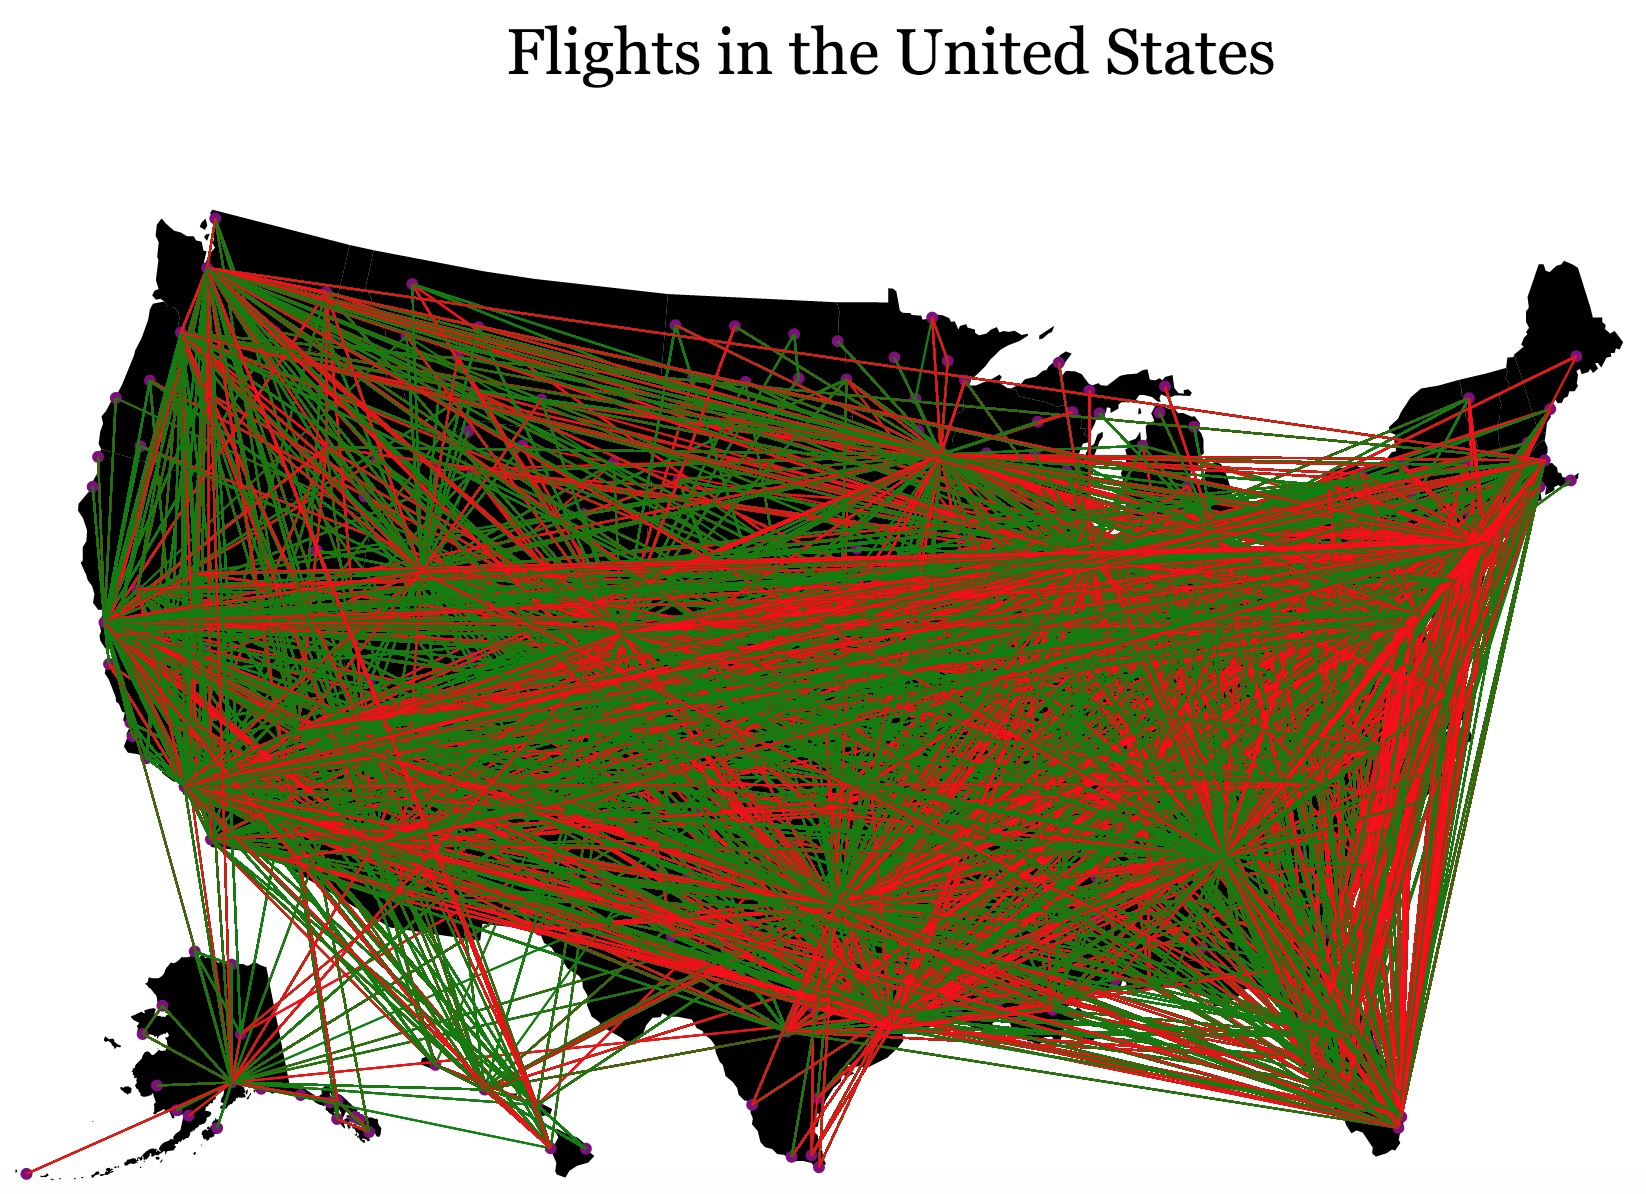

Yikes! That was a mess and needed to be cleaned up. So I took a subset from that to examine that map in more detail.

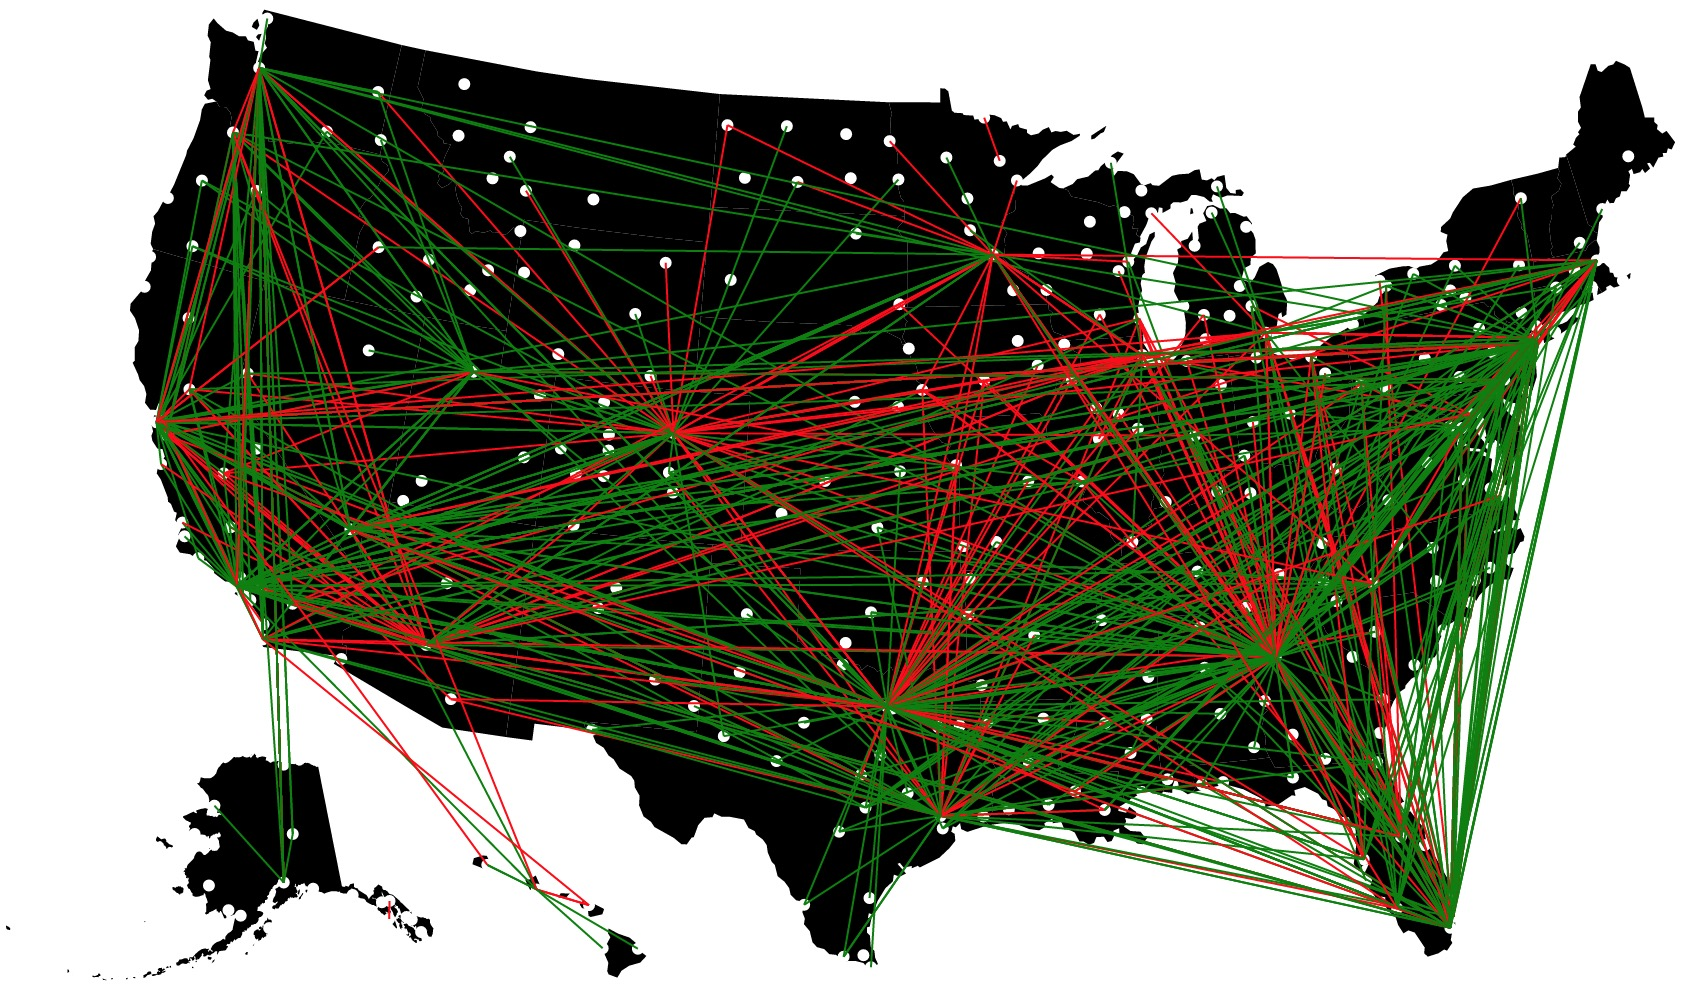

In [ ]:
# I used this code to make the straight lines. I deleted it later on since I wanted to curve the routes.
#       // var lines = svg.selectAll("line")
#       //                 .data(flightsData)
#       //                 .enter()
#       //                 .append("line")
#       //                 .attr("x1", function(d){ return projection(coords[d.ORIGIN_AIRPORT])[0] })
#       //                 .attr("y1", function(d){ return projection(coords[d.ORIGIN_AIRPORT])[1] })
#       //                 .attr("x2", function(d){ return projection(coords[d.ORIGIN_AIRPORT])[0] })
#       //                 .attr("y2", function(d){ return projection(coords[d.ORIGIN_AIRPORT])[1] })
#       //                 .attr("stroke", function(d){
#       //                   if((+d.DEPARTURE_DELAY + +d.ARRIVAL_DELAY) <= 0){ return "green" }
#       //                   else{ return "red" }
#       //                 })
#       //                 .on("mouseover", showInfo)
#       //                 .on("mouseout", deleteInfo)
#       //                 .transition()
#       //                 .duration(5000)
#       //                 .attr("x2", function(d){ return projection(coords[d.DESTINATION_AIRPORT])[0] })
#       //                 .attr("y2", function(d){ return projection(coords[d.DESTINATION_AIRPORT])[1] })

It looked better but to make it more realistic, I aspired to add some curves to it. To do so, I asked Dr. Z on the best way to curve these paths and he said to look up Bezier curves.

So, using the code on this [website](http://bl.ocks.org/mhkeller/f41cceac3e7ed969eaeb), I was able to create the curves.

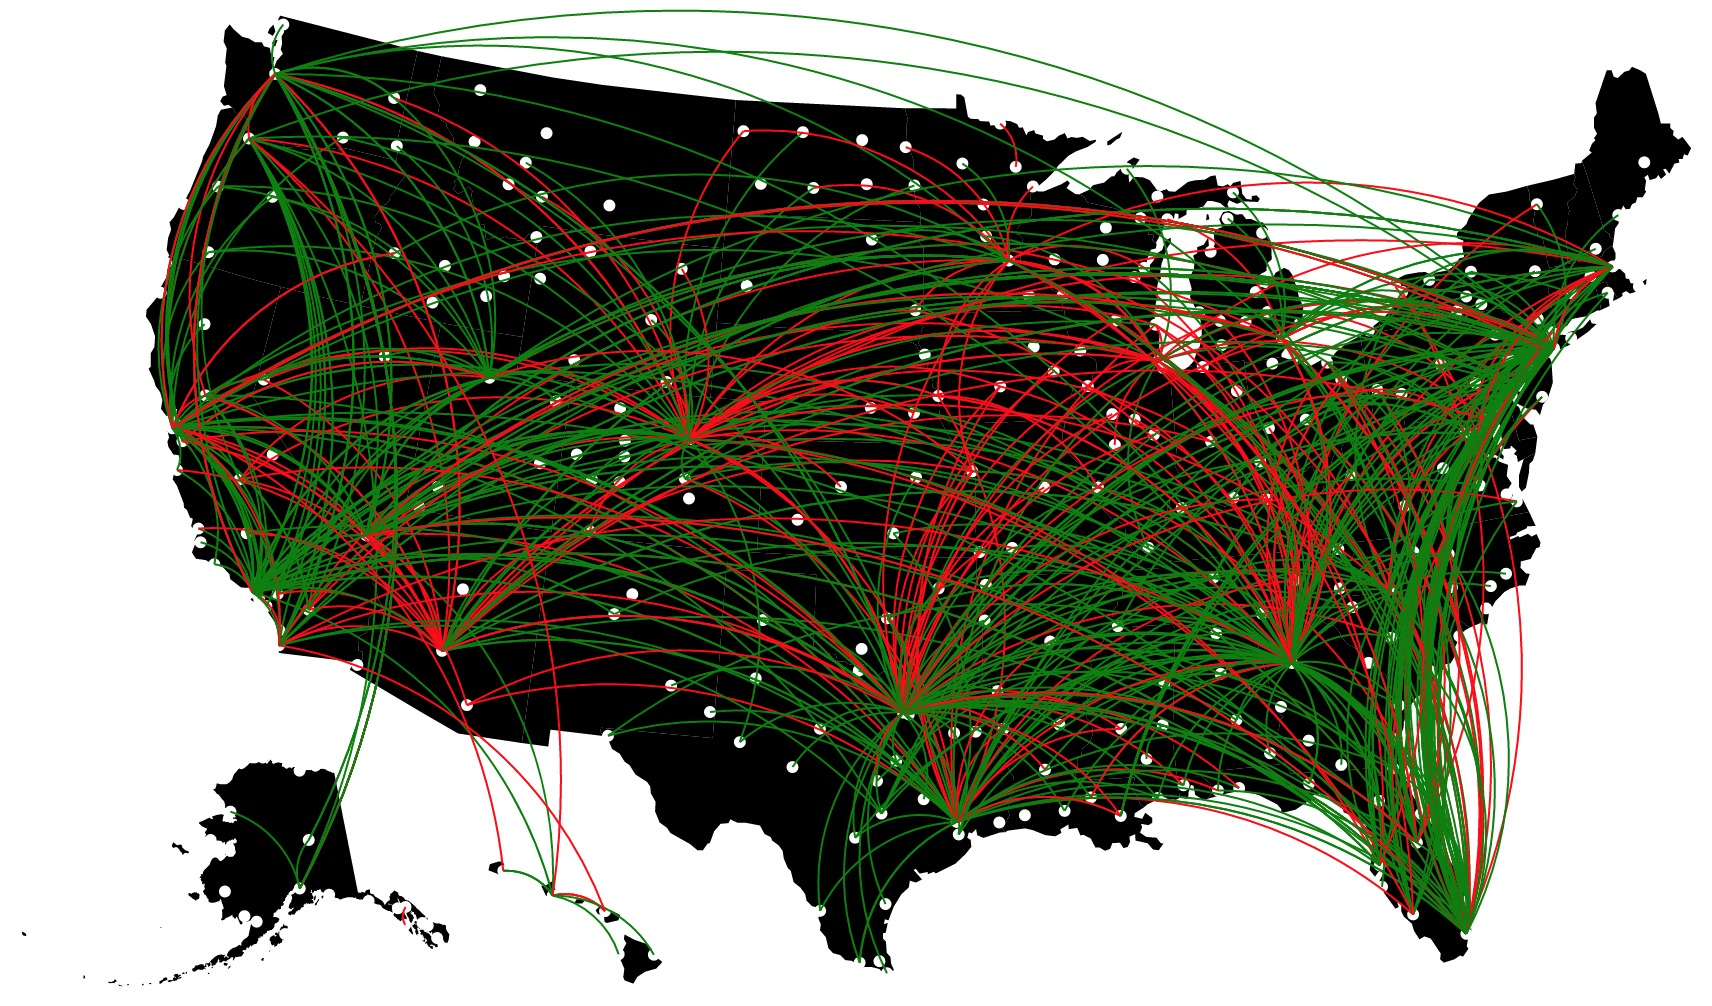

But no animation was appearing so I did some research and came across this [link](https://www.yerich.net/blog/bezier-curve-animation-using-d3), which showed me what to do. I used the delay function specifically to do this. When the animations finally came, I replayed them multiple times and noticed an odd trend – almost all of the flights were departing from west to east. Before when the lines were linear, they would go from east to west as well; but now they don't. To fix this, I played around with the code for the coordinates to arc conversion function and eventually fixed it.

In [ ]:
# arcs.selectAll("path")
#             .data(data)
#             .enter()
#             .append("path")
#             .attr("d", function(d){ return lngLatToArc(d, 0) })
#             .attr("stroke", function(d){
#               if((+d.DEPARTURE_DELAY + +d.ARRIVAL_DELAY) <= 0){ return "green" }
#               else{ return "red" }
#             })
#             .attr("fill", "none")
#             .attr("stroke-dasharray", 1000)
#             .attr("stroke-dashoffset", 1000)
#             .attr("animation", "dash 5s linear forwards")
#             .on("mouseover", showInfo)
#             .on("mouseout", deleteInfo)
#             .transition()
#             // .delay(function(d, i){ return (+d[""])*100 })
#             .duration(2000)
#             // .attrTween("stroke-dasharray", function() {
#             //     var len = this.getTotalLength();
#             //     return function(t) { return (d3.interpolateString("0," + len, len + ",0"))(t) };
#             // })
#             .attr("stroke-dashoffset", 0)
#       }
# function animateLine() {
#     var l = this.getTotalLength();
#     i = d3.interpolateString("0," + l, l + "," + l);
#     return function(t) { return i(t); };
# }
# function lngLatToArc(d, bend){
#     bend = bend || 1;
#     var start = projection(coords[d.ORIGIN_AIRPORT]);
#     var end = projection(coords[d.DESTINATION_AIRPORT]);

#     if(start[0] && end[0]){
#       var dx = end[0] - start[0],
#       dy = end[1] - start[1],
#       dr = Math.sqrt(dx*dx + dy*dy)*bend;
#       var west = (end[0] - start[0]) < 0;
#       if(west){ dr *= -1 }
#       return "M" + start[0] + "," + start[1] + "A" + dr + "," + dr + " 0 0,0" + end[0] + "," + end[1];
#     }
# }

Now, I wanted to make the visualization change on a monthly basis. To do so, I needed to find a way to access each line and draw it one by one. This [link](https://stackoverflow.com/questions/26720288/how-to-unroll-multiple-lines-using-d3-one-after-another-without-code-duplica) and this [link](https://css-tricks.com/almanac/properties/s/stroke-dasharray/) here really helped me understand how to do so. Also, because it doesn't make sense to animate each line in sequential order, I decided to animate them all at once, so I removed the delay function code.

Finally, I had it working. I added some information at the bottom of the page and made my visualization a bit more appealing. This is a screenshot of the final product in the month of December and a route highlighted.

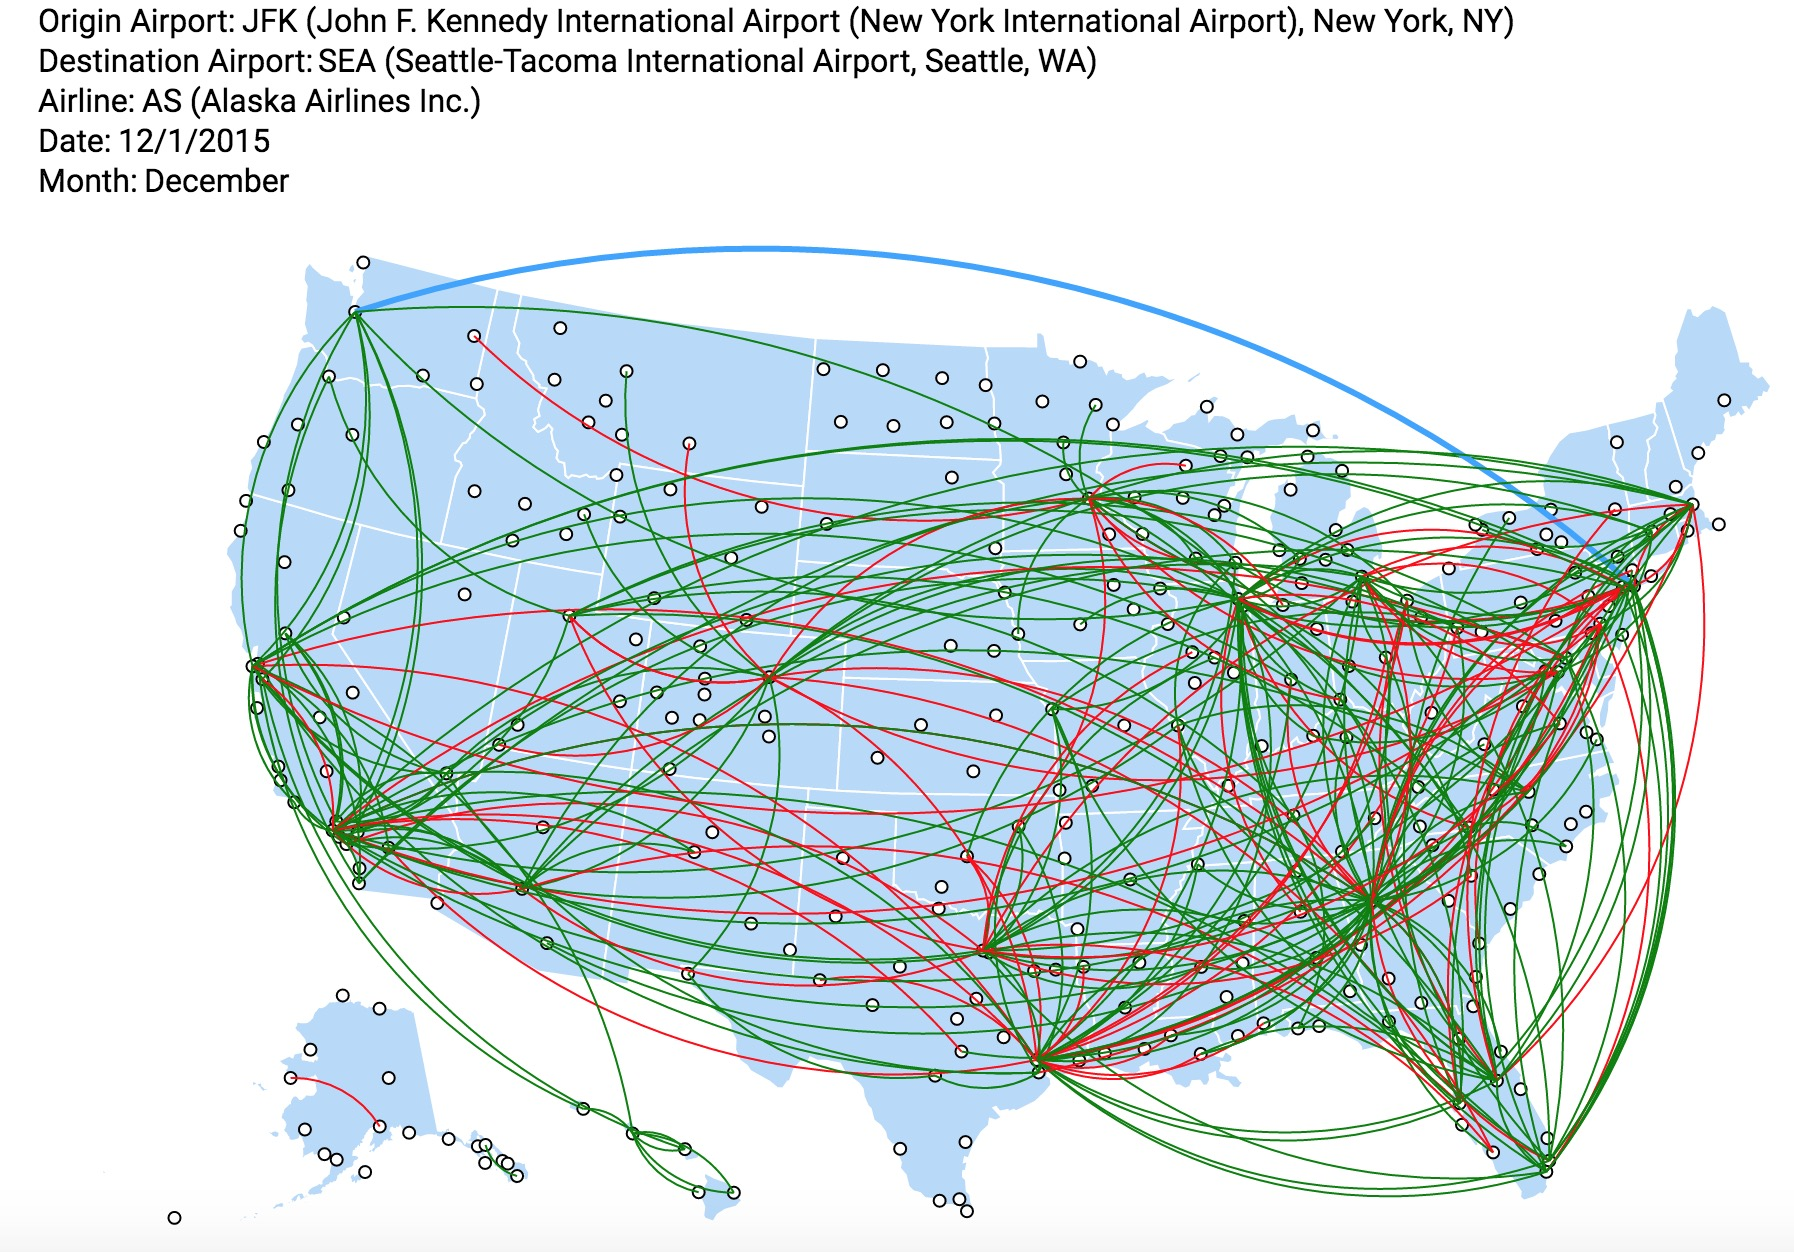

Here are other sources that I used that I may or may not have already cited in this notebook:

https://www.kaggle.com/usdot/flight-delays/data

http://bl.ocks.org/phil-pedruco/7745589

https://www.dashingd3js.com/creating-svg-elements-based-on-data